<a href="https://colab.research.google.com/github/pawel0508/MachineLearning_UcznieNienadzorowane/blob/main/enbelow_metho_Metoda%C5%81okcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3)


In [34]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 1000, centers = 4, cluster_std = 1.5, center_box = (-8.0, 8.0), random_state = 42)[0]
df = pd.DataFrame(data, columns = ['x1', 'x2'])
df.head()

,x1,x2
0,-6.645730,5.470461
1,-4.390559,-5.055149
2,-4.666211,-5.390080
3,3.022862,0.303769
4,3.322516,-0.676179


In [5]:
px.scatter(data_frame = df, x = 'x1', y = 'x2', template = 'plotly_dark', title = 'Clusters')

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans.inertia_

3851.5468342108547

In [8]:
y_kmeans = kmeans.predict(data)

In [9]:
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,3
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,1
4,3.322516,-0.676179,1


In [11]:
px.scatter(data_frame = df, x = 'x1', y = 'x2', color = 'y_kmeans', title = 'K Means: 5 Clusters', template = 'plotly_dark')

In [20]:
wcss = []
for i in range(2, 10):
  cluster = KMeans(n_clusters = i)
  cluster.fit(data)
  wcss.append(cluster.inertia_)

print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3852.779931211515, 3443.1986350839484, 3117.5229266369006, 2718.924928015933, 2480.0758805815085]


In [21]:
wcss = pd.DataFrame(data = wcss, columns = ['wcss'])

In [22]:
wcss = wcss.reset_index()
wcss

,index,wcss
0,0,23414.040459
1,1,7734.886635
2,2,4282.137027
3,3,3852.779931
4,4,3443.198635
5,5,3117.522927
6,6,2718.924928
7,7,2480.075881


In [24]:
wcss = wcss.rename(columns = {'index' : 'clusters'})

In [26]:
wcss['clusters'] = wcss['clusters'] + 1 

In [27]:
wcss

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3852.779931
4,5,3443.198635
5,6,3117.522927
6,7,2718.924928
7,8,2480.075881


Metoda łokcia - Elbow Method

In [31]:
px.line(data_frame = wcss, x = 'clusters', y = 'wcss', width=950, height=500,
        title='Within-Cluster-Sum of Squared Errors (WCSS)', template = 'plotly_dark')

Wizualizacja klastrów


In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_pred = kmeans.predict(data)

In [35]:
df['y_pred'] = y_pred

In [36]:
df

,x1,x2,y_pred
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2
...,...,...,...
995,-2.411446,-3.691538,1
996,-1.071178,8.153947,0
997,2.287805,5.527109,2
998,-6.417970,-5.784545,1


In [40]:
px.scatter(data_frame=df, x = 'x1', y = 'x2', color = 'y_pred', template = 'plotly_dark', width=950, height=500, title='Algorytm K-średnich - 3 klastry')

In [41]:
centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['c1', 'c2'])

In [42]:
centers

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [46]:
fig = px.scatter(data_frame=df, x = 'x1', y = 'x2', color = 'y_pred', 
                 template = 'plotly_dark', width=950, height=500, title='Algorytm K-średnich - 3 klastry')
fig.add_trace(go.Scatter(x = centers['c1'], y = centers['c2'], mode='markers', 
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}}, 
                         showlegend=False))
fig.show()


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



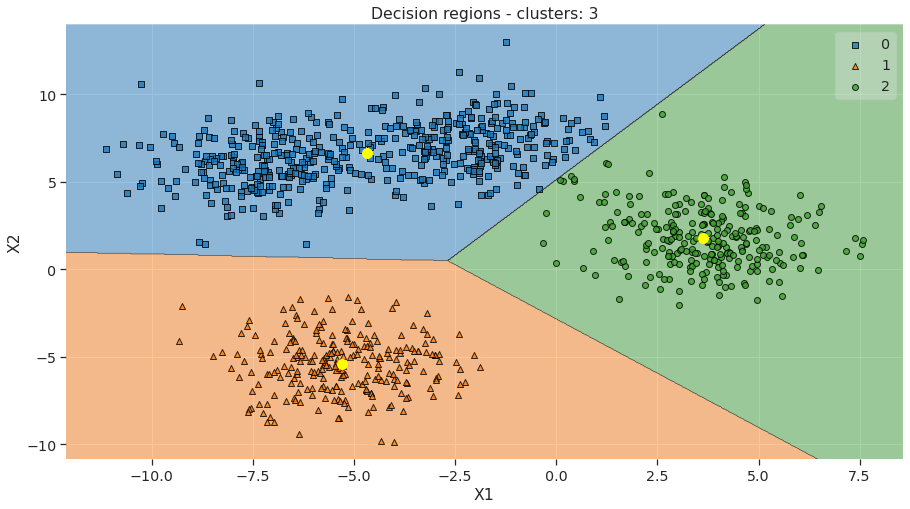

In [47]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (15, 8))
plt.title('Decision regions - clusters: 3')
plot_decision_regions(data, y_pred, clf = kmeans, legend = 1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()